<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [111]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [112]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [113]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [114]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [119]:
m = movies.sort_values(by=['duration'])
m.head(1).duration # shortest duration

389    64
Name: duration, dtype: int64

In [120]:
m.tail(1).duration # longest duration

476    242
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

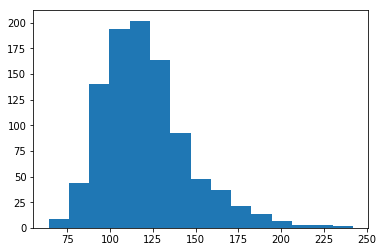

In [92]:
plt.hist(movies.duration, bins=15);

#### Use a box plot to display that same data.

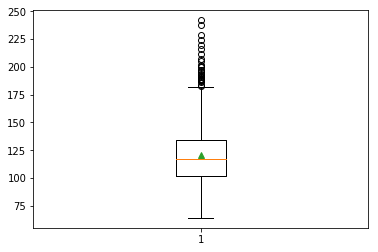

In [93]:
plt.boxplot(movies.duration,showmeans=True);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [127]:
m = movies.groupby(movies.content_rating).size();
m

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

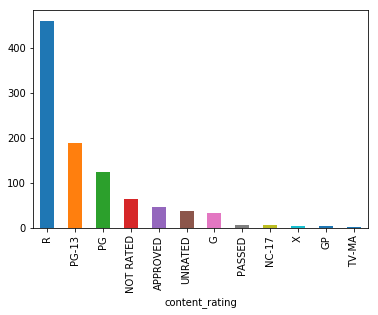

In [129]:
m.sort_values(ascending=False).plot(kind='bar');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [371]:
movies.loc[movies.content_rating.isin(["NOT RATED", "APPROVED", "PASSED","GP"]),'content_rating'] = "UNRATED"

movies[movies.content_rating == "UNRATED"].head(5)

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,UNRATED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
29,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [240]:
movies.loc[movies.content_rating.isin(["X", "TV-MA"]),'content_rating'] = "NC-17"

movies[movies.content_rating == "NC-17"].head(5)

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,NC-17,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
219,8.1,Who's Afraid of Virginia Woolf?,NC-17,Drama,131,"[u'Elizabeth Taylor', u'Richard Burton', u'Geo..."
387,8.0,Midnight Cowboy,NC-17,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
456,7.9,Blue Is the Warmest Color,NC-17,Drama,179,"[u'L\xe9a Seydoux', u'Ad\xe8le Exarchopoulos',..."
486,7.8,Evil Dead II,NC-17,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"


#### Count the number of missing values in each column.

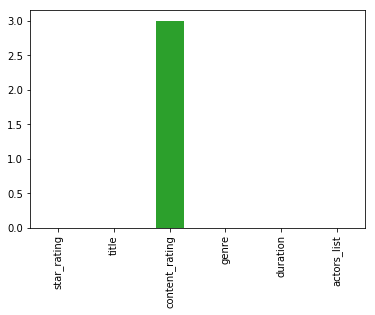

In [135]:
movies.isnull().sum().plot(kind='bar');

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [141]:
movies.fillna(value='STILL NOT RATED',inplace=True)
movies[movies.content_rating == "STILL NOT RATED"]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,STILL NOT RATED,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,STILL NOT RATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,STILL NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [147]:
gt2_star_rating = movies[movies.duration >= 120].star_rating.mean()
lt2_star_rating = movies[movies.duration < 120].star_rating.mean()
print("The average star rating for movies greater than 2 hours is "+str(gt2_star_rating))
print("The average star rating for movies less than 2 hours is "+str(lt2_star_rating))
if(gt2_star_rating > lt2_star_rating):
    print("The average star rating for movies greater than 2 hours is LARGER")
else:
    print("The average star rating for movies less than 2 hours is LARGER")

The average star rating for movies greater than 2 hours is 7.948898678414082
The average star rating for movies less than 2 hours is 7.838666666666657
The average star rating for movies greater than 2 hours is LARGER


#### Use a visualization to detect whether there is a relationship between duration and star rating.

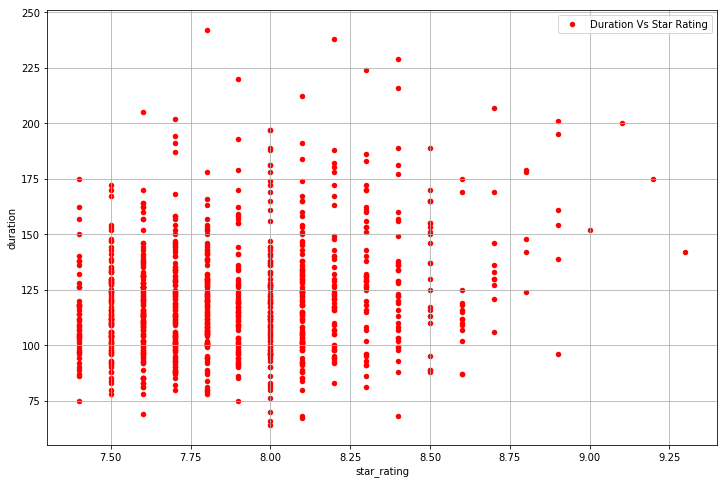

In [164]:
movies[:].plot(kind='scatter',x='star_rating', y='duration' ,figsize=(12,8), grid=True, label="Duration Vs Star Rating", color="red"); 

## It does not look like there is much of a correlation between duration and rating

#### Calculate the average duration for each genre.

In [168]:
movies.groupby(movies.genre).duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

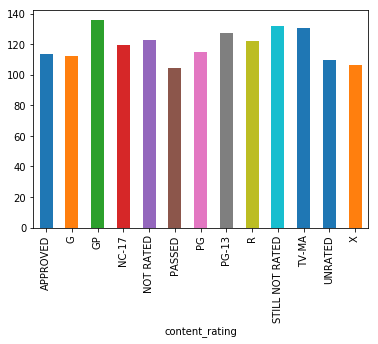

In [173]:
movies.groupby(movies.content_rating).duration.mean().plot(kind='bar');

#### Determine the top rated movie (by star rating) for each genre.

In [188]:
#df.loc[df.groupby(["sp", "mt"])["count"].idxmax()]  
movies.loc[movies.groupby(movies.genre).star_rating.idxmax()]


,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
105,8.3,The Third Man,NOT RATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [201]:
movies.groupby(movies.title).title.count().sort_values(ascending=False)
# We can see from the Series below, there 4 movies that potentialy are duplicate

title
Dracula                                           2
Les Miserables                                    2
True Grit                                         2
The Girl with the Dragon Tattoo                   2
[Rec]                                             1
Harry Potter and the Prisoner of Azkaban          1
Harry Potter and the Goblet of Fire               1
Harry Potter and the Half-Blood Prince            1
Harry Potter and the Order of the Phoenix         1
Harvey                                            1
Harry Potter and the Sorcerer's Stone             1
Harry Potter and the Deathly Hallows: Part 1      1
Head-On                                           1
Heat                                              1
Heavenly Creatures                                1
Her                                               1
Harry Potter and the Deathly Hallows: Part 2      1
Harold and Maude                                  1
High Noon                                         1
Hard B

In [382]:
#check and remove any duplicate rows
movies[movies.duplicated(keep=False)]
#Given that the resulting DataFrane is empty, there are no dupllicates

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [405]:
movies.groupby(movies.genre).title.count().sort_values(ascending=False)

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: title, dtype: int64

In [452]:
# Manual list created with the top genres
top_g = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
df_top_g = pd.DataFrame({'count':top_g})

# creating a DataFrame with the genre index as a column and the count as the other column
df_top_g.reset_index(level=0, drop=True,inplace=True) #level=0, 
df_top_g.rename(columns = {'count':'genre'}, inplace = True)

genre_mean = movies.groupby(movies.genre).star_rating.mean()
df_genre_mean = pd.DataFrame({'mean':genre_mean})

# creating a DataFrame with the genre index as a column and the mean as the other column
df_genre_mean.reset_index(level=0, inplace=True)

#merge the two data frames
pd.merge(df_top_g,df_genre_mean,how='inner')

,genre,mean
0,Drama,7.902518
1,Comedy,7.822436
2,Action,7.884559
3,Crime,7.916935
4,Biography,7.862338
5,Adventure,7.933333
6,Animation,7.914516
7,Horror,7.806897
8,Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [404]:
top_g = movies.groupby(movies.genre).title.count().sort_values(ascending=False).compress(lambda x: x >9)
df_top_g = pd.DataFrame({'count':top_g})
df_top_g.reset_index(level=0, inplace=True)

genre_mean = movies.groupby(movies.genre).star_rating.mean()
df_genre_mean = pd.DataFrame({'mean':genre_mean})
df_genre_mean.reset_index(level=0, inplace=True)
pd.merge(df_top_g,df_genre_mean,how='inner')

,genre,count,mean
0,Drama,278,7.902518
1,Comedy,156,7.822436
2,Action,136,7.884559
3,Crime,124,7.916935
4,Biography,77,7.862338
5,Adventure,75,7.933333
6,Animation,62,7.914516
7,Horror,29,7.806897
8,Mystery,16,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [453]:
df_movies = movies.groupby(movies.genre).agg({'genre':'count','star_rating':'mean'})
df_movies[movies.groupby(movies.genre).genre.count() > 9]

,genre,star_rating
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [454]:
aggr=movies.groupby(movies.genre).agg({'genre':'count','star_rating':'mean'})#.sort_values(ascending=False).compress(lambda x: x >9)
aggr[aggr.genre > 9]

,genre,star_rating
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

## Getting the list of actors that starred in 10 or more movies

In [275]:
import ast
actor_dict = {}
#itereate through the dataframe to the actor list and then create a actor dictionary 
#that has for each actor the number of movies they are in
for i in range(len(movies)):
    a_list = ast.literal_eval(movies['actors_list'][i])
    for item in a_list:
        #check if the actor is in the dictionary
        if item in actor_dict:
            #if the actor is in the dict, increment the value
            actor_dict[item] = actor_dict.get(item)+1
        else:
            #else set the value to 1
            actor_dict[item] = 1
        

#print(actor_dict)

In [381]:
sor = sorted(actor_dict.items(),reverse=True, key=lambda x: x[1])
print("List of actors that are in 10 movies or greater in this database\n")
max_num = len(actor_dict)

for i in sor:
    if i[1] > 9:
        print (i[0], i[1])
        
print("\nOut of a total of "+str(max_num)+" only 13 actors starred in 10 or more movies")

List of actors that are in 10 movies or greater in this database

Robert De Niro 18
Clint Eastwood 14
Brad Pitt 14
Tom Hanks 14
Al Pacino 13
Johnny Depp 12
Christian Bale 11
Leonardo DiCaprio 11
Dustin Hoffman 11
Harrison Ford 10
James Stewart 10
Julianne Moore 10
Denzel Washington 10

Out of a total of 1777 only 13 actors starred in 10 or more movies
